### Setup

In [20]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import *

# Baca data dari CSV
df = pd.read_csv('water_potability.csv')

# Hapus data yang ada nullnya 
df.dropna(inplace = True) 
  
# Tambah nama Kolom
df.columns= ["id","pH","Hardness","Solids","Chloramines","Sulfate","Conductivity",
               "OrganicCarbon","Trihalomethanes","Turbidity","Potability"]

#bikin jadi 2 data berdasarkan kolom Potability
df0 = df[df["Potability"]==0]
df1 = df[df["Potability"]==1]

### Soal 1
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

In [66]:
#tipe data yang bersifat numerik
accepted_data_type = ["int","float","complex"]

'''
mean 
median 
modus 
standar deviasi 
variansi 
range 
minimum 
maksimum 
kuartil 
IQR
skewness 
kurtosis
'''
print(df.describe())
print("Mean:")
print(df1.mean())
print("")
print("Median")
print(df1.median())
print()
print("Mode:")
for column in df1:
    print('{:<16}'.format(column),end="")
    print('{:>13}'.format(df1[column].mode().loc[0].round(5)))
print("")
print("Standar Deviasi:")
print(df1.std())
print("")
print("Variansi:")
print(df1.var())
print("")
print("Maksimum:")
print(df1.max())
print("")
print("Minimum:")
print(df1.min())
print("")
print("Range:")
print(df1.max()-df1.min())
print("Kuartil 1:")
print(df1.quantile(.25))
print("")
print("Kuartil 2:")
print(df1.quantile(.50))
print("")
print("Kuartil 3:")
print(df1.quantile(.75))
print("")
print("Interquartile Range:")
print(df1.quantile(.75) - df.quantile(.25))
print("")
print("Skewness:")
print(df1.skew())
print("")
print("Kurtosis:")
print(df1.kurt())

'''
Cara Print 2
print("Mean:")
print(df.groupby('Potability').mean())
print("")
'''

                id           pH     Hardness        Solids  Chloramines  \
count  2009.000000  2009.000000  2009.000000   2009.000000  2009.000000   
mean   1006.000000     7.086581   195.960048  21904.616822     7.133862   
std     580.092665     1.572955    32.648709   8627.545029     1.585474   
min       2.000000     0.227499    73.492234    320.942611     1.390871   
25%     504.000000     6.090016   176.736376  15613.160533     6.137757   
50%    1006.000000     7.027297   197.191839  20920.251561     7.140122   
75%    1508.000000     8.052894   216.454108  27172.893573     8.110140   
max    2010.000000    14.000000   317.338124  56488.672413    13.127000   

           Sulfate  Conductivity  OrganicCarbon  Trihalomethanes    Turbidity  \
count  2009.000000   2009.000000    2009.000000      2009.000000  2009.000000   
mean    333.199592    426.508172      14.355910        66.383822     3.969169   
std      41.217984     80.709632       3.325352        16.067261     0.780527   


'\nCara Print 2\nprint("Mean:")\nprint(df.groupby(\'Potability\').mean())\nprint("")\n'

### Soal 2

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.


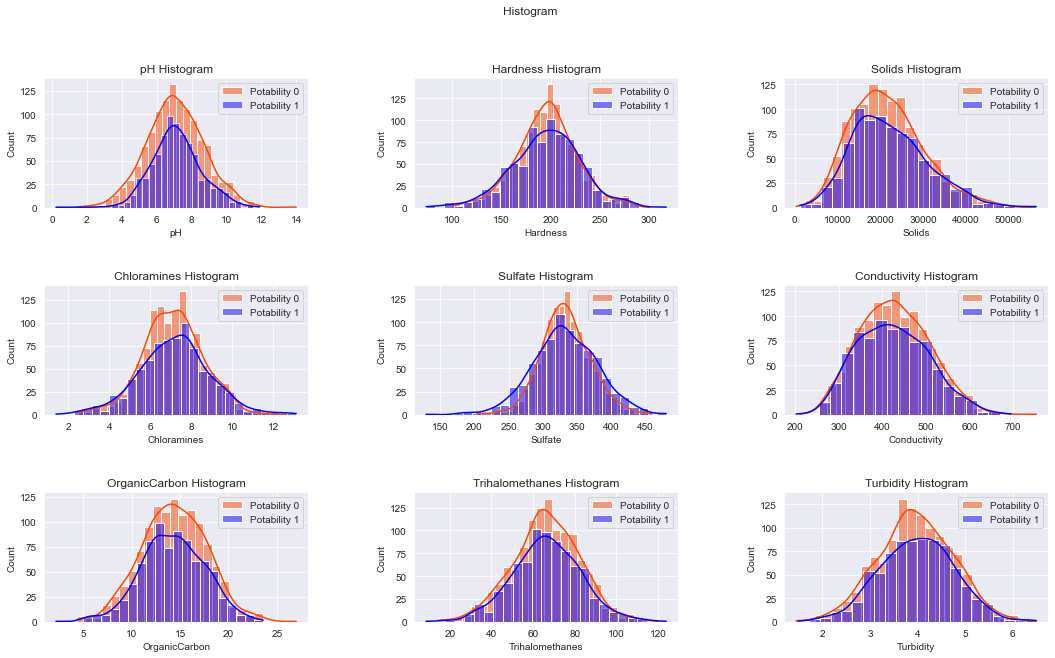

In [9]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
 

fig.suptitle('Histogram')
 
i=0
for cols in df:
    if(df[cols].dtype in accepted_data_type):
        sns.color_palette("rocket_r", as_cmap=True)
        sns.histplot(ax=axes[i//3, i % 3], data=df0, x=cols, color="orangered", label="Potability 0", kde=True).set_title(cols + " Histogram")
        sns.histplot(ax=axes[i//3, i % 3], data=df1, x=cols,color = 'blue' ,label="Potability 1", kde=True)
        axes[i//3, i % 3].legend()
        i += 1
plt.subplots_adjust(hspace=0.6, wspace = 0.4)
plt.legend()
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 20))
 
fig.suptitle('Boxplot')
 
i=0
for cols in df:
    if(df[cols].dtype in accepted_data_type):
        sns.boxplot(ax=axes[i//3, i % 3], x="Potability", y=cols, data=df).set_title(cols + " Boxplot")
        i += 1
plt.subplots_adjust(hspace=0.4, wspace = 0.4)


### Soal 3

In [22]:
def print_result(stat,p):
    print("stat=%.3f, p=%.10f" %(stat, p), end=" ")
    if p>0.05:
        print("Normal")
    else:
        print("Tidak")

for cols in df1:
    print('================='+cols+'================')
    data = df1[cols]
    stat, p = shapiro(data)
    print("Shapiro Test : ", end="")
    print_result(stat, p)
    stat, p = normaltest(data)
    print("D'Agostiono Test : ", end="")
    print_result(stat, p)
    stat, p = chisquare(data)
    print("Chi-square Test : ", end="")
    print_result(stat, p)
    stat, p = jarque_bera(data)
    print("Jarque-Bera Test : ", end="")
    print_result(stat, p)
    stat, p = kstest(data,'norm')
    print("Kolmogorov-Smirnov Test : ", end="")
    print_result(stat, p)



=================id================
Shapiro Test : stat=0.942, p=0.0000000000 Tidak
D'Agostiono Test : stat=637.516, p=0.0000000000 Tidak
Chi-square Test : stat=243671.111, p=0.0000000000 Tidak
Jarque-Bera Test : stat=49.935, p=0.0000000000 Tidak
Kolmogorov-Smirnov Test : stat=1.000, p=0.0000000000 Tidak
=================pH================
Shapiro Test : stat=0.988, p=0.0000036872 Tidak
D'Agostiono Test : stat=21.237, p=0.0000244543 Tidak
Chi-square Test : stat=234.387, p=1.0000000000 Normal
Jarque-Bera Test : stat=45.319, p=0.0000000001 Tidak
Kolmogorov-Smirnov Test : stat=0.994, p=0.0000000000 Tidak
=================Hardness================
Shapiro Test : stat=0.995, p=0.0050815679 Tidak
D'Agostiono Test : stat=9.913, p=0.0070384810 Tidak
Chi-square Test : stat=5152.304, p=0.0000000000 Tidak
Jarque-Bera Test : stat=12.088, p=0.0023724917 Tidak
Kolmogorov-Smirnov Test : stat=1.000, p=0.0000000000 Tidak
=================Solids================
Shapiro Test : stat=0.977, p=0.0000000006 T

C:\Python310\lib\site-packages\scipy\stats\_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Python310\lib\site-packages\scipy\stats\_stats_py.py:1632: RuntimeWarning: invalid value encountered in double_scalars
  skewness = (1 / n * np.sum(diffx**3)) / (1 / n * np.sum(diffx**2))**(3 / 2.)
C:\Python310\lib\site-packages\scipy\stats\_stats_py.py:1633: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis = (1 / n * np.sum(diffx**4)) / (1 / n * np.sum(diffx**2))**2


### Soal 4
Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

a. Nilai Rata-rata pH di atas 7?

b. Nilai Rata-rata Hardness tidak sama dengan 205?

c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan
10%?

e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

Sumber yang Kami Gunakan Untuk Menentukan Jenis Test yang digunakan: https://sonalake.com/latest/an-introduction-to-hypothesis-testing/

### Soal 4.a
1. H0: pH = 7.0
2. H1: pH > 7.0
3. α = 0.05
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. p-value =  0.013702359487596755
6. Tolak H0

Soal 4.a
1. H0: pH = 7.0
2. H1: pH > 7.0
3. α = 0.05
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. p-value =  0.013702359487596755
6. Tolak H0


<AxesSubplot:>

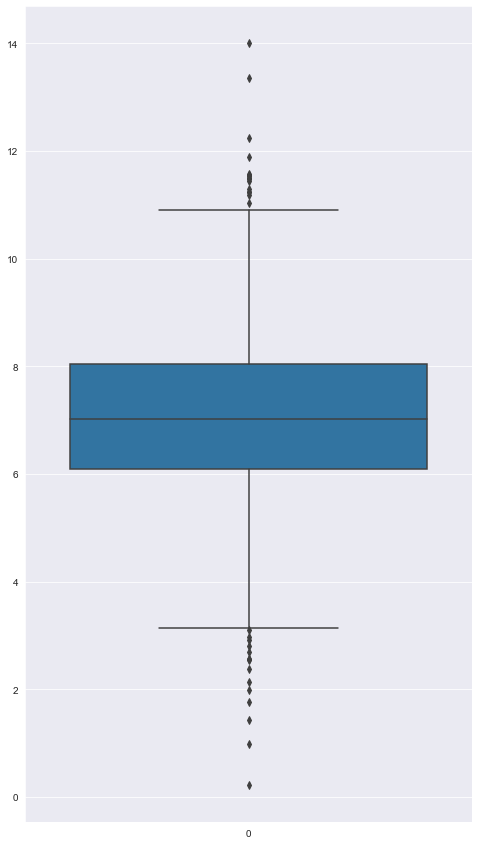

In [116]:
from scipy import stats

print("Soal 4.a")
mean = 7.0
print("1. H0: pH =", mean)
print("2. H1: pH >", mean)
alpha = 0.05
print("3. α =",alpha)
print("4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai")
t_value,p_value=stats.ttest_1samp(df["pH"],mean)
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

plt.figure(figsize=(8,15))
sns.boxplot(data=df["pH"])

### Soal 4.b
1. H0: Hardness = 205.0
2. H1: Hardness != 205.0
3. α = 0.025
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. p-value =  3.951588599098364e-34
6. Tolak H0

Soal 4.b
1. H0: Hardness = 205.0
2. H1: Hardness != 205.0
3. α = 0.025
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. p-value =  3.951588599098364e-34
6. Tolak H0


<AxesSubplot:>

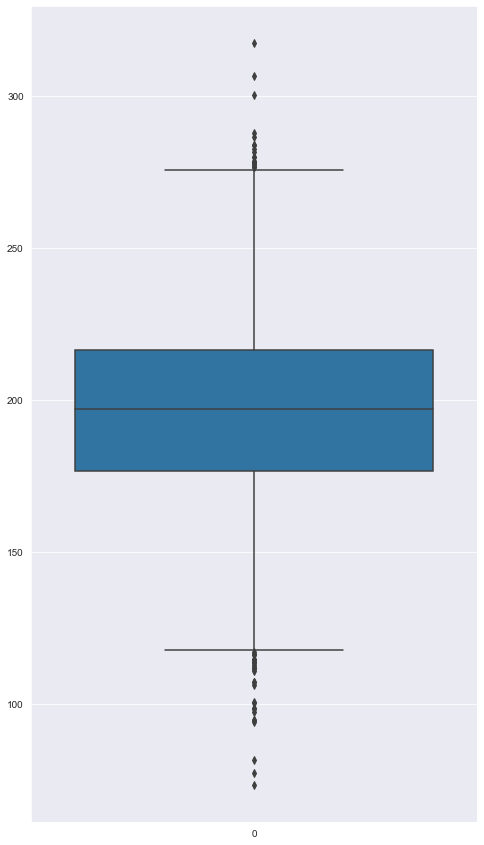

In [117]:
from scipy import stats

print("Soal 4.b")
mean = 205.0
print("1. H0: Hardness =", mean)
print("2. H1: Hardness !=", mean)
alpha = 0.025 #karena two tailed test
print("3. α =",alpha)
print("4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai")
t_value,p_value=stats.ttest_1samp(df["Hardness"],mean)
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")
plt.figure(figsize=(8,15))
sns.boxplot(data=df["Hardness"])

### Soal 4.c
1. H0: Solids = 21900.0
2. H1: Solids != 21900.0
3. α = 0.025
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. p-value =  0.5373441230987632
6. Tolak H1

Soal 4.c
1. H0: Solids = 21900.0
2. H1: Solids != 21900.0
3. α = 0.025
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. p-value =  0.5373441230987632
6. Tolak H1


<AxesSubplot:>

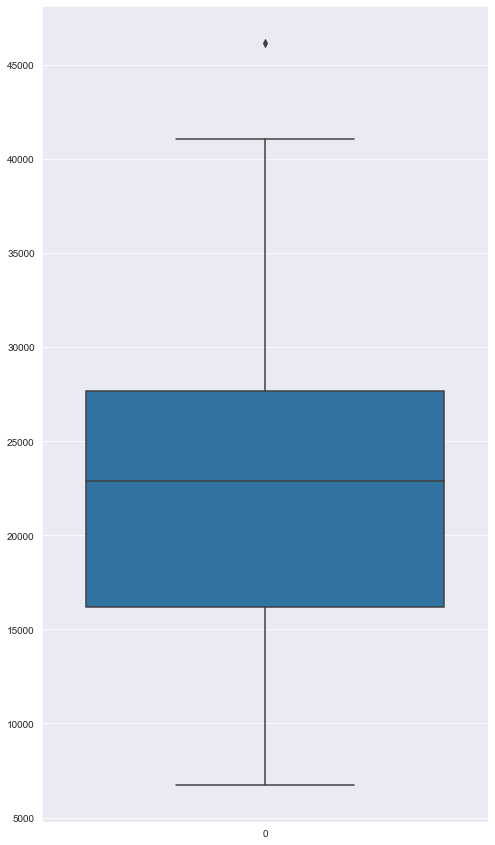

In [118]:
from scipy import stats

print("Soal 4.c")
mean = 21900.0
print("1. H0: Solids =",mean)
print("2. H1: Solids !=", mean)
alpha = 0.025 #karena two tailed test
print("3. α =",alpha)
print("4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai")
t_value,p_value=stats.ttest_1samp(df["Solids"].head(100),mean)
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")
plt.figure(figsize=(8,15))
sns.boxplot(data=df["Solids"].head(100))

### Soal 4.d
1. H0: Proporsi Conductivity yang Lebih dari 450 = 0.1
2. H1: Proporsi Conductivity yang Lebih dari 450 != 0.1
3. α = 0.025
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
5. p-value =  1.1281379553506125e-139
6. Tolak H0

Soal 4.d
1. H0: Proporsi Conductivity yang Lebih dari 450 = 0.1
2. H1: Proporsi Conductivity yang Lebih dari 450 != 0.1
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
5. p-value =  1.1281379553506125e-139
6. Tolak H0


<AxesSubplot:>

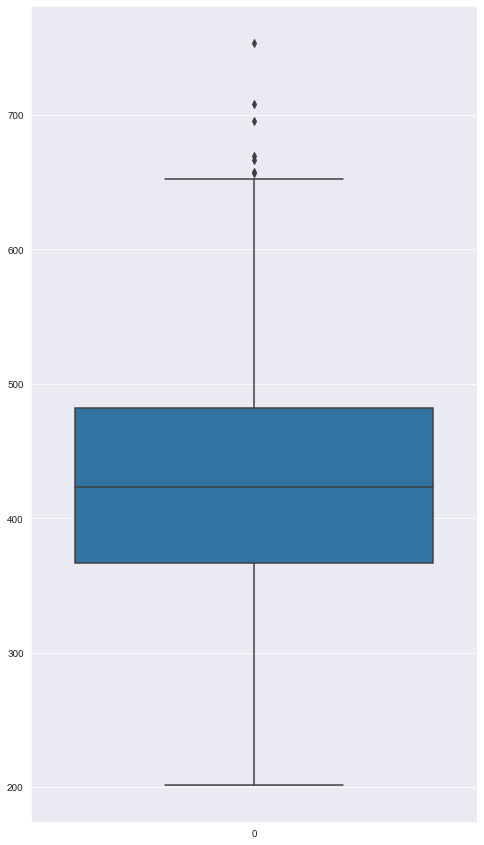

In [119]:
from statsmodels.stats.proportion import proportions_ztest

null_hypothesis = 0.1
conduct = df["Conductivity"]
sample_success = conduct[conduct>450.0].count()
sample_size = df["Conductivity"].count()
alpha = 0.05

print("Soal 4.d")
print("1. H0: Proporsi Conductivity yang Lebih dari 450 =", null_hypothesis)
print("2. H1: Proporsi Conductivity yang Lebih dari 450 !=", null_hypothesis)
print("3. α =",alpha)
print("4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai")
t_value,p_value= proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='larger')
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

plt.figure(figsize=(8,15))
sns.boxplot(data=df["Conductivity"])

### Soal 4.e
1. H0: Proporsi Trihalomethanes yang Lebih dari 40 = 0.05
2. H1: Proporsi Trihalomethanes yang Lebih dari 40 < 0.05
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
5. p-value =  0.2898326945860968
6. Tolak H1

Soal 4.e
1. H0: Proporsi Conductivity yang Lebih dari 40 = 0.05
2. H1: Proporsi Conductivity yang Lebih dari 40 < 0.05
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
5. p-value =  0.2898326945860968
6. Tolak H1


<AxesSubplot:>

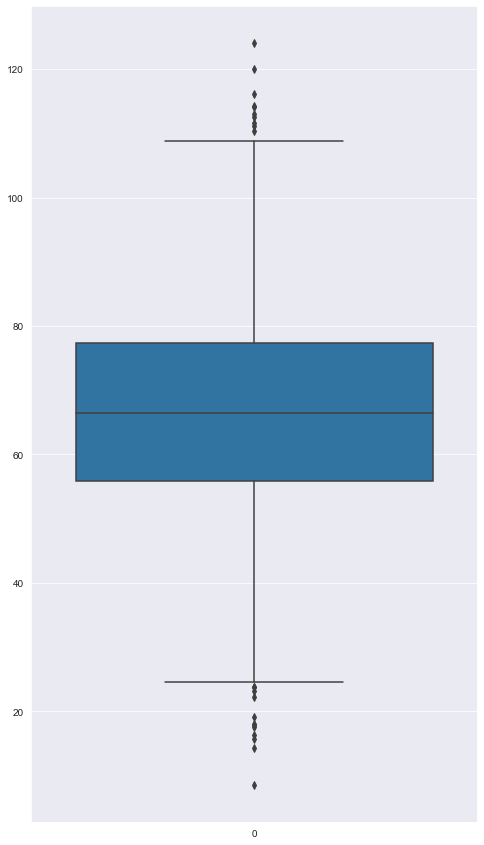

In [120]:
from statsmodels.stats.proportion import proportions_ztest

null_hypothesis = 0.05
Trihalomethanes = df["Trihalomethanes"]
sample_success = Trihalomethanes[Trihalomethanes<40].count()
sample_size = df["Trihalomethanes"].count()
alpha = 0.05

print("Soal 4.e")
print("1. H0: Proporsi Conductivity yang Lebih dari 40 =", null_hypothesis)
print("2. H1: Proporsi Conductivity yang Lebih dari 40 <", null_hypothesis)
print("3. α =",alpha)
print("4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai")
t_value,p_value= proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='larger')
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")
plt.figure(figsize=(8,15))
sns.boxplot(data=df["Trihalomethanes"])

### Soal 5
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata kedua bagian tersebut sama?

b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada,
proporsi nilai yang sama di bagian akhir Turbidity ?

### Soal 5.a
1. H0: Rata-rata bagian awal = Rata-rata bagian akhir
2. H1: Rata-rata bagian awal != Rata-rata bagian akhir
3. α = 0.05
4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama
5. p-value =  0.0368965161184979
6. Tolak H0

In [115]:
from scipy.stats import ttest_ind

midpoint = int(df["Sulfate"].count()/2)
awal = df.iloc[:midpoint,:]
akhir = df.iloc[midpoint:,:]
awal = awal["Sulfate"]
akhir = akhir["Sulfate"]

#null_hypotesis = perbedaan rata-rata dari kedua sample
null_hypothesis = 0
alpha = 0.05 #karena two tailed test

print("Soal 5.a")
print("1. H0: Rata-rata bagian awal = Rata-rata bagian akhir")
print("2. H1: Rata-rata bagian awal != Rata-rata bagian akhir")
print("3. α =",alpha)
print("4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama")
t_value,p_value= ttest_ind(awal,akhir, equal_var=True)
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

Soal 5.a
1. H0: Rata-rata bagian awal = Rata-rata bagian akhir
2. H1: Rata-rata bagian awal != Rata-rata bagian akhir
3. α = 0.05
4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama
5. p-value =  0.0368965161184979
6. Tolak H0


### Soal 5.b

In [111]:
from scipy.stats import ttest_ind

midpoint = int(df["OrganicCarbon"].count()/2)
awal = df.iloc[:midpoint,:]
akhir = df.iloc[midpoint:,:]
awal = awal["OrganicCarbon"]
akhir = akhir["OrganicCarbon"]

#null_hypotesis = perbedaan rata-rata dari kedua sample
null_hypothesis = 0
alpha = 0.05

print("Soal 5.a")
print("1. H0: Rata-rata bagian awal - Rata-rata bagian akhir = 0.15")
print("2. H1: Rata-rata bagian awal - Rata-rata bagian akhir != 0.15")
print("3. α =",alpha)
print("4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama")
t_value,p_value= ttest_ind(awal,akhir, equal_var=True)
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

1005
1709.4468186165016 1682.7330644425087
Soal 5.a
1. H0: Rata-rata bagian awal = Rata-rata bagian akhir
2. H1: Rata-rata bagian awal != Rata-rata bagian akhir
3. α = 0.05
4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama
5. p-value =  0.0368965161184979
6. Tolak H0


### Soal 5.c

In [125]:
from scipy.stats import ttest_ind

end = df["Sulfate"].count()
awal = df.iloc[:100,:]
akhir = df.iloc[end-100:,:]
awal = awal["Chloramines"]
akhir = akhir["Chloramines"]
alpha = 0.05

print("Soal 5.c")
print("1. H0: Rata-rata 100 data awal = Rata-rata 100 data akhir")
print("2. H1: Rata-rata 100 data awal != Rata-rata 100 data akhir")
print("3. α =",alpha)
print("4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama")
t_value,p_value= ttest_ind(awal,akhir, equal_var=True)
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

Soal 5.a
1. H0: Rata-rata 100 data awal = Rata-rata 100 data akhir
2. H1: Rata-rata 100 data awal != Rata-rata 100 data akhir
3. α = 0.05
4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama
5. p-value =  0.44676017233305654
6. Tolak H1


### Soal 5.d

Soal 4.d
1. H0: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal = bagian akhir
2. H1: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal > bagian akhir
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
-0.1569235575631641
5. p-value =  0.5623474531912108
6. Tolak H1


<AxesSubplot:>

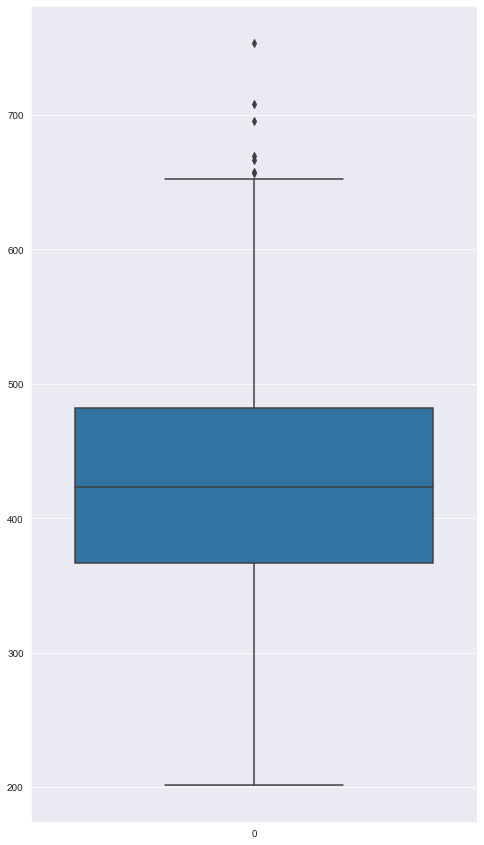

In [163]:
from statsmodels.stats.proportion import proportions_ztest

midpoint = int(df["Turbidity"].count()/2)
awal = df.iloc[:midpoint,:]
akhir = df.iloc[midpoint:,:]
awal_success = awal[awal["Turbidity"]>4.0]
awal_success_count = awal_success["Turbidity"].count()
akhir_success = akhir[akhir["Turbidity"]>4.0]
akhir_success_count = akhir_success["Turbidity"].count()
sample_size = df["Turbidity"].count()
alpha = 0.05
successes = np.array([awal_success_count, akhir_success_count])
samples = np.array([awal["id"].count(), akhir["id"].count()])

print("Soal 4.d")
print("1. H0: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal = bagian akhir")
print("2. H1: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal > bagian akhir")
print("3. α =",alpha)
print("4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai")
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='larger')
print("5. p-value = ",(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

plt.figure(figsize=(8,15))
sns.boxplot(data=df["Conductivity"])

### Soal 5.e

1709.4468186165016 1682.7330644425087
Soal 5.e
1. H0: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal = bagian akhir
2. H1: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal != bagian akhir
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
1.0329099504846848
5. p-value =  0.3040662566644321
6. Tolak H1


<AxesSubplot:>

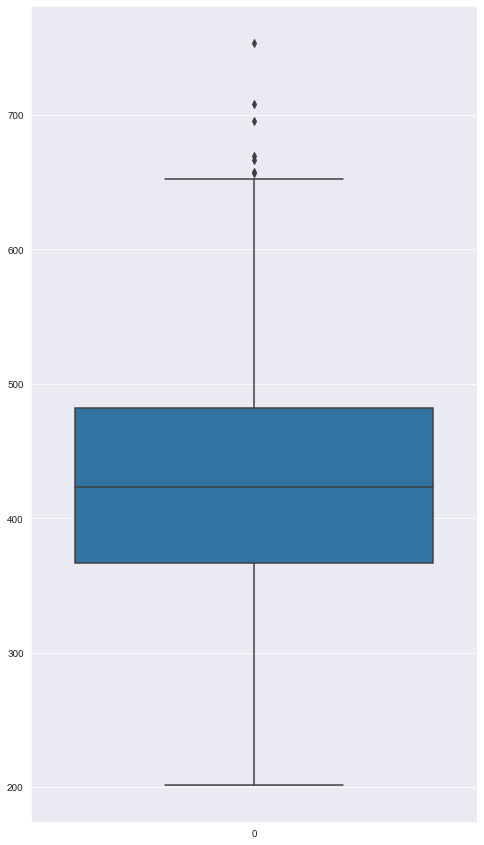

In [167]:
import scipy.stats

def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

midpoint = int(df["Sulfate"].count()/2)
awal = df.iloc[:midpoint,:]
akhir = df.iloc[midpoint:,:]

print(awal["Sulfate"].var(),akhir["Sulfate"].var())


print("Soal 5.e")
print("1. H0: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal = bagian akhir")
print("2. H1: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal != bagian akhir")
print("3. α =",alpha)
print("4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai")
stat, p_value = f_test(awal["Turbidity"], akhir["Turbidity"])
print(stat)
print("5. p-value = ",(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

plt.figure(figsize=(8,15))
sns.boxplot(data=df["Conductivity"])